In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from matplotlib import animation
from matplotlib.animation import PillowWriter

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [10 , 10]

# Units

In [39]:
G_pu = 6.67430e-8       #cm^3 g^-1 s^-2
r_pu = 1.49597870707e13 #cm
m_pu = 1.989e33         #g

v_pu = np.sqrt(G_pu * m_pu / r_pu) #cm/s

time_pu = r_pu/v_pu #seconds

E_pu = G_pu*(m_pu**2)/r_pu #cm^2 g s^-2 = erg

Rescaling

In [40]:
v_pu = v_pu/1e5 #km/s
print(f"v_pu/v_iu = {v_pu:.2f} (km/s)/iu")

time_pu = time_pu/(3.156e7) #years
print(f"time_pu/time_iu = {time_pu:.3f} years/iu")

E_pu 
print(f"E_pu/E_iu = {E_pu:.2e} erg/iu")

v_pu/v_iu = 29.79 (km/s)/iu
time_pu/time_iu = 0.159 years/iu
E_pu/E_iu = 1.77e+46 erg/iu


# Plot & Animation

In [41]:
data = np.loadtxt('./sphere.out')

time = data[:, 0]
x = data[:, 1::6].T
y = data[:, 2::6].T
z = data[:, 3::6].T
vx = data[:, 4::6].T
vy = data[:, 5::6].T
vz = data[:, 6::6].T
N = len(x[:, 0])

Collapse time

In [52]:
def Dist(x1, y1, z1, x2, y2, z2):
    return np.linalg.norm(np.array([x1-x2, y1-y2, z1-z2]), axis=0)

dist = np.zeros(len(time))

for i in range(len(x[:, 0])):
    for j in range(len(x[:, 0])):
        dist = dist + Dist(x[i, :], y[i, :], z[i], x[j], y[j], z[j])

In [53]:
dist

array([10376.77349916, 10361.71494968, 10336.77950551, 10301.86804043,
       10256.73641097, 10201.7317338 , 10137.18519986, 10062.10094204,
        9977.15510476,  9881.52588384,  9775.03670015,  9658.21176346,
        9530.75904744,  9392.09139928,  9242.24762501,  9081.02229383,
        8909.2453293 ,  8725.93216368,  8530.88623504,  8324.14845612,
        8104.53406819,  7871.75530193,  7625.60649607,  7366.41314821,
        7093.16111956,  6804.41726962,  6501.1554076 ,  6182.07095345,
        5846.84420122,  5496.9330331 ,  5132.40581515,  4756.84850075,
        4379.79433563,  4002.44055307,  3621.71611849,  3239.47081013,
        2878.6595896 ,  2562.20466567,  2300.93442938,  2148.99251698,
        2151.79835616,  2284.84154078,  2517.4407073 ,  2815.64465472,
        3143.81514057,  3486.65569316,  3836.03930149,  4177.89504341,
        4506.54278287,  4818.42010669,  5113.80595209,  5393.57451403,
        5663.40511478,  5927.16943576,  6181.22825857,  6422.93919295,
      

In [54]:
T_collapse = time[np.argsort(dist)[0]]
T_collapse

0.4000004703335525

### Plot

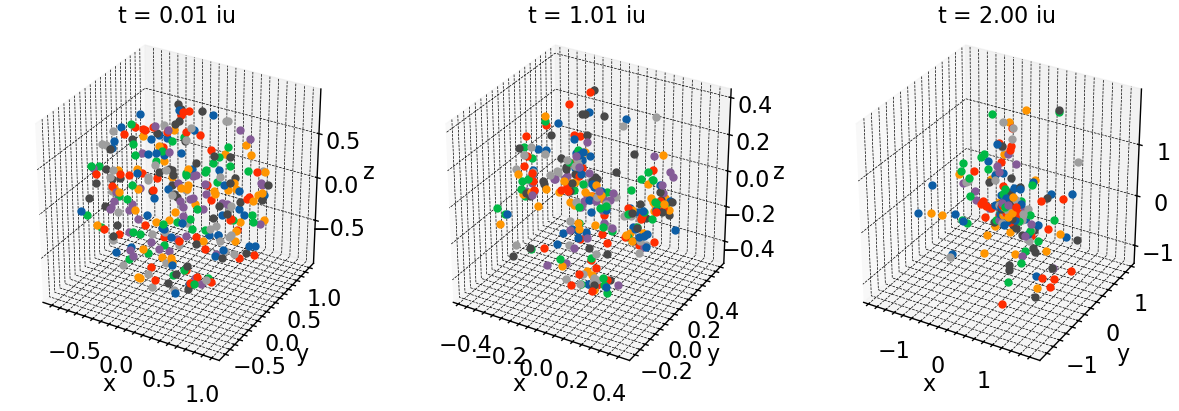

In [5]:
plt.rcParams['figure.figsize'] = [15 , 10]

fig, axes = plt.subplots(1, 3, subplot_kw={'projection':'3d'})

ax = axes[0]
ax.set_box_aspect([1, 1, 1])
ax.set_title(f't = ${time[0]:.2f}$ iu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for i in range(len(x[:,])):
    ax.plot3D(x[i, 0], y[i, 0], z[i, 0], 'o', markersize=5)
    
ax = axes[1]
ax.set_box_aspect([1, 1, 1])
ax.set_title(f't = ${time[round(0.5*len(time))]:.2f}$ iu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for i in range(len(x[:,])):
    ax.plot3D(x[i, np.argsort(time)[round(0.5*len(time))]], y[i, np.argsort(time)[round(0.5*len(time))]], z[i, np.argsort(time)[round(0.5*len(time))]], 'o', markersize=5)
    
ax = axes[2]
ax.set_box_aspect([1, 1, 1])
ax.set_title(f't = ${time[-1]:.2f}$ iu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for i in range(len(x[:,])):
    ax.plot3D(x[i, -1], y[i, -1], z[i, -1], 'o', markersize=5)

### Animation

In [6]:
# if len(x)=N, then the animation will have N/k frames
k = 1

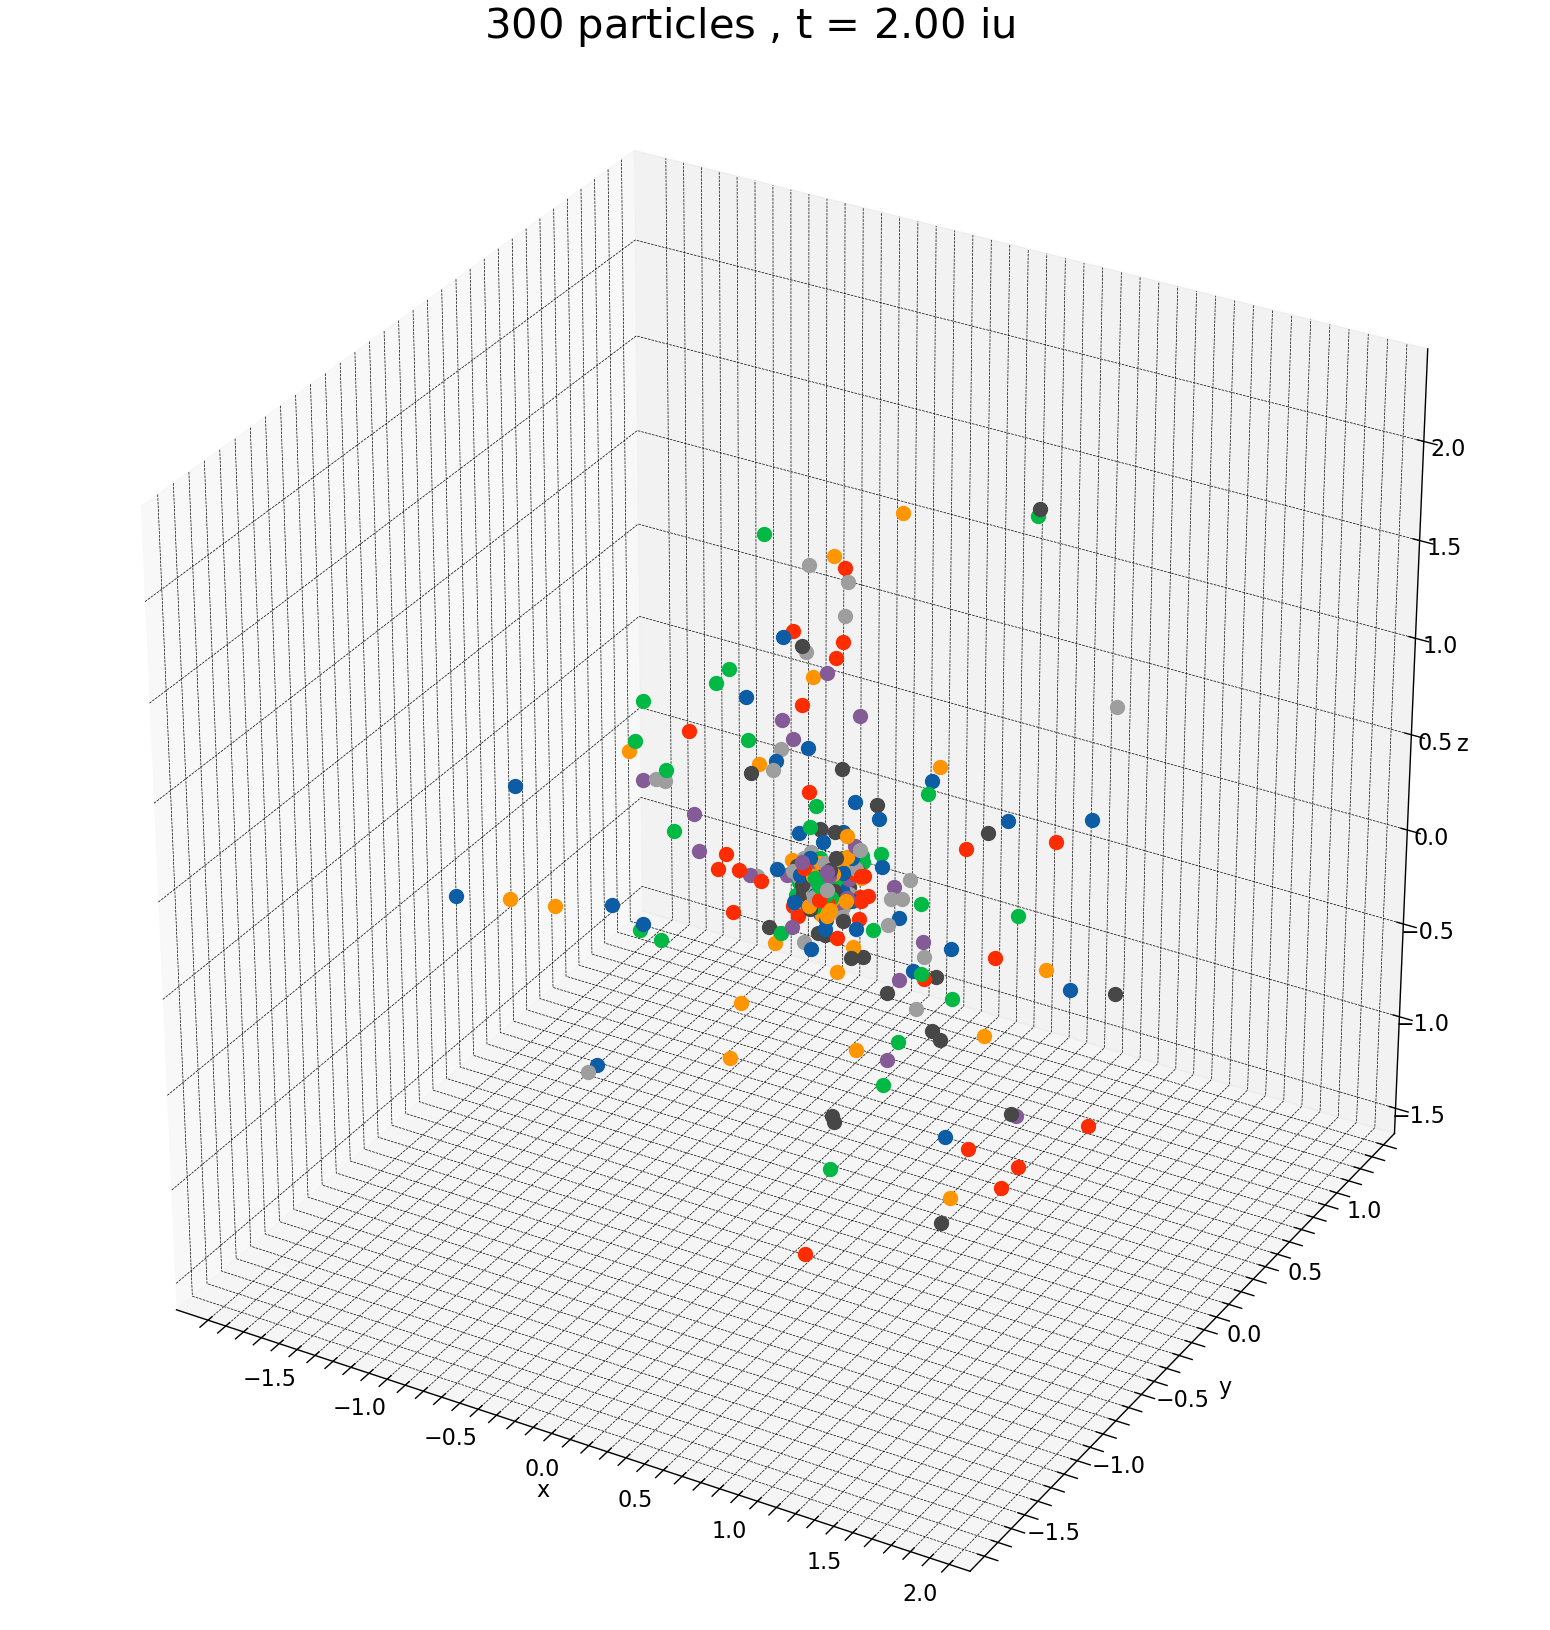

In [7]:
plt.rcParams['figure.figsize'] = [20 , 20]

#fig = plt.Figure() #somehow faster than fig, ax = plt.subplots(1,1), but text doesn't work well
#ax = fig.add_subplot()
fig, axes = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
ax = axes
title = fig.suptitle(f'{N} particles', fontsize=30, y=0.92)

def animate(i):
    print(math.ceil(100*i*k/len(x[0])), "%", end='\r')
    
    ax.clear()
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(1.2*np.min(x), 1.2*np.max(x))
    ax.set_ylim(1.2*np.min(y), 1.2*np.max(y))
    ax.set_zlim(1.2*np.min(z), 1.2*np.max(z))
    title.set_text(f'${N}$ particles , t = ${time[k*i]:.2f}$ iu')
    
    for j in range(len(x[:,])):
        ax.plot3D(x[j, k*i], y[j, k*i], z[j, k*i], 'o', markersize=10)
    return fig,

writer = animation.FFMpegWriter(fps=60)
ani = animation.FuncAnimation(fig, animate, frames=int(len(x[0])/k), interval=1, blit=True)
ani.save('sphere.gif', writer=writer, dpi=100)